# Proyecto complementario
En esta parte complementaria del proyecto analizaremos otro algoritmo de clasificacion y hablaremos de posibles subajustes y sobreajustes. 

In [55]:
import pandas as pd
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
# Datos
CBP = pd.read_csv('https://media.githubusercontent.com/media/Gonzalo-Ariel-Alonso/Proyecto_Data_Science/master/Company%20Bankruptcy%20Prediction.csv')
CBP

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


# Algortimos de Prediccion
Existen varios algoritmos diferentes para la prediccion de una clasificacion, en la parte III de nuestro proyecto utilizamos el algoritmo de regrecion logistica, en este caso probaremos con un arbol de decisión.

In [57]:
# Escalado
from sklearn.preprocessing import MinMaxScaler as MMS
scaler = MMS()
CBP_scaled = scaler.fit_transform(CBP)
CBP_scaled = pd.DataFrame(CBP_scaled, columns = list(CBP.columns))

# Division de varaibles
x = CBP_scaled.loc[:, CBP.columns != 'Bankrupt?']
y = CBP_scaled['Bankrupt?']

# Balanceo 

from imblearn.over_sampling import SMOTE

os = SMOTE()
x_os , y_os = os.fit_resample(x,y)

In [58]:
# Tomamos las columnas mas importantes que obtivimos en la parte III del proyecto
x_os = x_os[[' Continuous interest rate (after tax)',
 ' Cash flow rate',
 ' Persistent EPS in the Last Four Seasons',
 ' Borrowing dependency',
 ' Working Capital/Equity',
 ' Equity to Long-term Liability',
 ' Cash Flow to Liability',
 ' Liability-Assets Flag',
 ' Equity to Liability']]

In [59]:
# Separacion de datos de prueba y entrenamiento
X_train, X_test , y_train , y_test = train_test_split(x_os , y_os ,test_size = 0.2)

## Arbol de decisión

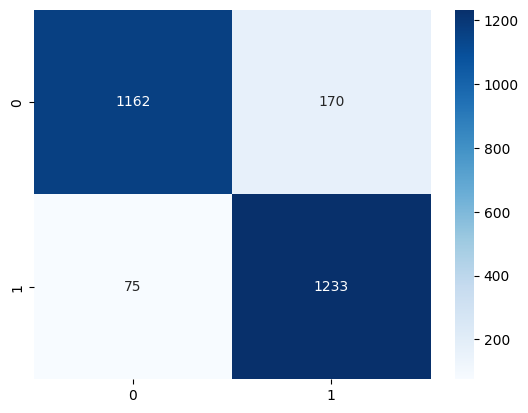

In [60]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth = 5)
tree.fit(X_train, y_train )
y_pred = tree.predict(X_test)

# Matriz de confusion
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(data = cm, annot = True,cmap='Blues', fmt='g')
plt.show()

Nuestro arbol binario obtuvo 170 Falsos positivos y 75 falsos negativos, si lo comparamos con el algortimo de regresion que hicimos en la parte III del proyecto que obtuvo 158 falsos negativos y 147 falsos positivos. En nuestro caso particular como se explico en la parte III, el foco debe estar en reducir los falsos positivos lo maximo posible, es por esto que a pesar de que el arbol de clasificación tiene menos errores totales, no es el mas adecuado para nuestro proyecto.

# Overfiting and Underfiting
Si queremos saber si nuestro modelo esta subajustado o sobreajustado podemos compara las metricas de entrenamiento con las de prueba, si las metricas de entrenamiento son muy superiores a las de prueba, es una señal de sobreajuste, y si ambas metricas resutan ser muy bajas nuestro modelo puede estar subajustado.

In [61]:
y_pred_train = tree.predict(X_train)

print('Metricas de entrenamiento\n')
print(classification_report(y_train, y_pred_train))
print('Metricas de prediccion\n')
print(classification_report(y_test, y_pred))

Metricas de entrenamiento

              precision    recall  f1-score   support

         0.0       0.95      0.88      0.91      5267
         1.0       0.89      0.95      0.92      5291

    accuracy                           0.91     10558
   macro avg       0.92      0.91      0.91     10558
weighted avg       0.92      0.91      0.91     10558

Metricas de prediccion

              precision    recall  f1-score   support

         0.0       0.94      0.87      0.90      1332
         1.0       0.88      0.94      0.91      1308

    accuracy                           0.91      2640
   macro avg       0.91      0.91      0.91      2640
weighted avg       0.91      0.91      0.91      2640



En este primer caso ambas metricas tienen valores altos aceptables(mayores al 90%) y una variacion minima entre ellos(menor al 2%).

Sabemos que nuestro algoritmo es de tipo arbol de desicion, el nivel de sobreajuste y subajuste esta altamente relacionado con la profundidad(cantidad de niveles) del arbol, a mayor profundidad habra mayor sobreajuste, pero una profundida muy baja provocara un subajuste, es por ello que en el primer caso al utilizar un arbol con una cantidad media de niveles no obtivimos valores de sobreajuste ni subajuste.

Hagamos la prueba utilizando un arbol con 20 niveles y otro con 2.

In [64]:
tree_overfited = DecisionTreeClassifier(max_depth = 20)
tree_overfited.fit(X_train, y_train )

y_pred_overf = tree_overfited.predict(X_test)
y_pred_train_overf = tree_overfited.predict(X_train)

print('Metricas de entrenamiento\n')
print(classification_report(y_train, y_pred_train_overf))
print('Metricas de prediccion\n')
print(classification_report(y_test, y_pred_overf))

Metricas de entrenamiento

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5267
         1.0       1.00      1.00      1.00      5291

    accuracy                           1.00     10558
   macro avg       1.00      1.00      1.00     10558
weighted avg       1.00      1.00      1.00     10558

Metricas de prediccion

              precision    recall  f1-score   support

         0.0       0.95      0.93      0.94      1332
         1.0       0.93      0.95      0.94      1308

    accuracy                           0.94      2640
   macro avg       0.94      0.94      0.94      2640
weighted avg       0.94      0.94      0.94      2640



Podemos observar que con 20 niveles nuestro arbol queda sobreajustado ya que las metricas de entrenamiento son mucho mas altas que las de prediccion.

In [63]:
tree_underfited = DecisionTreeClassifier(max_depth = 2)
tree_underfited.fit(X_train, y_train )

y_pred_underf = tree_underfited.predict(X_test)
y_pred_train_underf = tree_underfited.predict(X_train)

print('Metricas de entrenamiento\n')
print(classification_report(y_train, y_pred_train_underf))
print('Metricas de prediccion\n')
print(classification_report(y_test, y_pred_underf))

Metricas de entrenamiento

              precision    recall  f1-score   support

         0.0       0.83      0.93      0.87      5267
         1.0       0.92      0.81      0.86      5291

    accuracy                           0.87     10558
   macro avg       0.87      0.87      0.87     10558
weighted avg       0.87      0.87      0.87     10558

Metricas de prediccion

              precision    recall  f1-score   support

         0.0       0.83      0.93      0.88      1332
         1.0       0.92      0.81      0.86      1308

    accuracy                           0.87      2640
   macro avg       0.87      0.87      0.87      2640
weighted avg       0.87      0.87      0.87      2640



En este caso solo con 2 niveles tanto las metricas de entrenamiento como las de prediccion son muy bajas, indicandonos un subajuste.

Es importante destacar que no hay un numero exacto del nivel de un arbol de desicion ya que este va a variar dependiendo de la cantidad de datos, la dimension, la cantidad de clasificaciones, entre otros. Lo mejor es buscar un balance que nos resultados altos en las metricas y similares entre datos de prueba y entrenamiento. 